In [3]:
import pickle as pkl
import numpy as np
import torch
from torch.nn import NLLLoss

1. Get edgelists as BLANT inputs

In [4]:
# for i in range(2, 50):
#     original_edges = f"../../graphs/tx_graph/tx_transaction_graph_timestamp_{i}.pkl"

#     G = pkl.load(open(original_edges, "rb"))
#     np.savetxt(f"edgelists/tx_transaction_graph_timestamp_{i}.el", list(G.edges()), fmt="%d")

2. Graphlet preprocessing

In [5]:
# Gs = []
# graphlets_list = []
# for i in range(1, 50):
#     Gs.append(pkl.load(open(f"../../graphs/tx_graph/tx_transaction_graph_timestamp_{i}.pkl", "rb")))
#     graphlets = np.loadtxt(f"graphlets/tx_{i}_dedup_6.graphlets", dtype=int)
#     graphlets_list.append(graphlets)

In [6]:
G1 = pkl.load(open(f"../../graphs/tx_graph/tx_transaction_graph_timestamp_1.pkl", "rb"))
graphlets1 = np.loadtxt(f"graphlets/tx_1_dedup_6.graphlets", dtype=int)

G2 = pkl.load(open(f"../../graphs/tx_graph/tx_transaction_graph_timestamp_2.pkl", "rb"))
graphlets2 = np.loadtxt(f"graphlets/tx_2_dedup_6.graphlets", dtype=int)

G3 = pkl.load(open(f"../../graphs/tx_graph/tx_transaction_graph_timestamp_3.pkl", "rb"))
graphlets3 = np.loadtxt(f"graphlets/tx_3_dedup_6.graphlets", dtype=int)

In [7]:
ids1, graphlets1 = graphlets1[:, 0], graphlets1[:, 1:]  # Do this after getting unique graphlets to account for orbits
ids2, graphlets2 = graphlets2[:, 0], graphlets2[:, 1:]  # Do this after getting unique graphlets to account for orbits
ids3, graphlets3 = graphlets3[:, 0], graphlets3[:, 1:]  # Do this after getting unique graphlets to account for orbits

In [8]:
len(set(ids1)), len(set(ids2)), len(set(ids3))

(105, 111, 112)

In [9]:
len(graphlets1), len(graphlets2), len(graphlets3)

(3349993, 2148325, 2090710)

In [ ]:
from importlib import reload
import graphlet_dataset  # the module, not the class
import random

# random.shuffle(graphlets2)

train_graphlets = graphlets1
val_graphlets = graphlets2
test_graphlets = graphlets3[:len(graphlets1)//2]  # Make test set the same size as train set for balanced eval

# Reload the module
reload(graphlet_dataset)

c:\Users\sebas\one\OneDrive\grive\faks\masters\y2\s1\MLG\MLG\Project\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'graphlet_dataset' from 'c:\\Users\\sebas\\one\\OneDrive\\grive\\faks\\masters\\y2\\s1\\MLG\\MLG\\Project\\src\\jupyter\\graphlet_dataset.py'>

In [11]:
def get_single_graphlet_label(graphlet,G ):
    node_classes = [G.nodes[n].get("class", 3) - 1 for n in graphlet]
    if 0 in node_classes: 
        return 0
    return max(set(node_classes), key=node_classes.count)

In [12]:
val_labels = [get_single_graphlet_label(g, G2) for g in val_graphlets]
test_labels = [get_single_graphlet_label(g, G3) for g in test_graphlets]
train_labels = [get_single_graphlet_label(g, G1) for g in train_graphlets]

from collections import Counter
Counter(val_labels), Counter(test_labels), Counter(train_labels)

(Counter({2.0: 1434150, 1.0: 638766, 0: 75409}),
 Counter({2.0: 1863373, 1.0: 218437, 0: 8900}),
 Counter({2.0: 1835456, 1.0: 1473413, 0: 41124}))

In [13]:
val_test   = set(tuple(sorted(g)) for g in val_graphlets)
test_test  = set(tuple(sorted(g)) for g in test_graphlets)
train_test = set(tuple(sorted(g)) for g in train_graphlets)

print("Val vs Test overlap:", len(val_test & test_test))
print("Train vs Val overlap:", len(train_test & val_test))
print("Train vs Test overlap:", len(train_test & test_test))


Val vs Test overlap: 0
Train vs Val overlap: 0
Train vs Test overlap: 0


## Creating datasets

In [ ]:
train_dataset = graphlet_dataset.GraphletDataset(train_graphlets, G1, labeled_only=True)
train_dataset.save_dataset("graphlet_datasets/tx_graphlet_train_dataset.pt")

val_dataset = graphlet_dataset.GraphletDataset(val_graphlets, G2, labeled_only=True)
val_dataset.save_dataset("graphlet_datasets/tx_graphlet_val_dataset.pt")

test_dataset = graphlet_dataset.GraphletDataset(test_graphlets, G3, labeled_only=True)
test_dataset.save_dataset("graphlet_datasets/tx_graphlet_test_dataset.pt")

['Time step', 'Local_feature_1', 'Local_feature_2', 'Local_feature_3', 'Local_feature_4', 'Local_feature_5', 'Local_feature_6', 'Local_feature_7', 'Local_feature_8', 'Local_feature_9', 'Local_feature_10', 'Local_feature_11', 'Local_feature_12', 'Local_feature_13', 'Local_feature_14', 'Local_feature_15', 'Local_feature_16', 'Local_feature_17', 'Local_feature_18', 'Local_feature_19', 'Local_feature_20', 'Local_feature_21', 'Local_feature_22', 'Local_feature_23', 'Local_feature_24', 'Local_feature_25', 'Local_feature_26', 'Local_feature_27', 'Local_feature_28', 'Local_feature_29', 'Local_feature_30', 'Local_feature_31', 'Local_feature_32', 'Local_feature_33', 'Local_feature_34', 'Local_feature_35', 'Local_feature_36', 'Local_feature_37', 'Local_feature_38', 'Local_feature_39', 'Local_feature_40', 'Local_feature_41', 'Local_feature_42', 'Local_feature_43', 'Local_feature_44', 'Local_feature_45', 'Local_feature_46', 'Local_feature_47', 'Local_feature_48', 'Local_feature_49', 'Local_feature_

## Loading datasets from disk

In [ ]:
# train_dataset = graphlet_dataset.load_dataset("graphlet_datasets/tx_graphlet_train_dataset.pt")
# val_dataset = graphlet_dataset.load_dataset("graphlet_datasets/tx_graphlet_val_dataset.pt")
# test_dataset = graphlet_dataset.load_dataset("graphlet_datasets/tx_graphlet_test_dataset.pt")

In [ ]:
len(train_dataset), len(val_dataset), len(test_dataset)

NameError: name 'train_dataset' is not defined

In [ ]:
train_dataset.get_label_distribution(), val_dataset.get_label_distribution(), test_dataset.get_label_distribution()

({0: 41124, 1: 353297}, {0: 38601, 1: 11522}, {0: 36808, 1: 11395})

In [ ]:
from torch_geometric.loader import DataLoader

val_loader = DataLoader(val_dataset, batch_size=16384, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16384, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=16384, shuffle=True)

### Training

In [ ]:
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout):
        super(GCN, self).__init__()
        self.count = 0
        self.convs = torch.nn.ModuleList()
        for i in range(num_layers):
            if i == 0:
                self.convs.append(GCNConv(input_dim, hidden_dim))
            elif i == num_layers - 1:
                self.convs.append(GCNConv(hidden_dim, output_dim))
            else:
                self.convs.append(GCNConv(hidden_dim, hidden_dim))
        # self.convs.append(GCNConv(hidden_dim, 6))

        self.lns = torch.nn.ModuleList([torch.nn.LayerNorm(hidden_dim) for _ in range(num_layers - 1)])
        self.softmax = torch.nn.LogSoftmax(dim=1)
        self.dropout = dropout

    def forward(self, x, adj_t):
        if torch.isnan(x).any():
            print(f"NaN in conv output layer: {self.count}")
        for i in range(len(self.convs)):
            x = self.convs[i](x, adj_t)
            if torch.isnan(x).any():
                print(f"NaN in conv output layer: {self.count}")
            self.count += 1

            # print("After Conv:")
            # print(x)
            if i < len(self.lns):
                x = self.lns[i](x)
                # print("After norm:")
                # print(x)
                x = torch.nn.functional.relu(x)
                # print("After RELU:")
                # print(x)
                x = torch.nn.functional.dropout(x, self.dropout, training=self.training)
                # print(x)
        # x = self.convs[-1](x, adj_t)
        return x

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from torch_scatter import scatter_mean  

def train(model, loader, optimizer, loss_fn):
    model.train()
    total_loss = 0
    count = 0

    for batch in loader:
        batch.x, batch.edge_index, batch.y, batch.batch = batch.x.to(device), batch.edge_index.to(device), batch.y.to(device), batch.batch.to(device)
        optimizer.zero_grad()
        
        out = model(batch.x, batch.edge_index)
        graphlet_out = scatter_mean(out, batch.batch, dim=0)

        y = batch.y

        # mask = y != 2

        # if mask.sum() == 0:   # skip empty batch
        #     continue

        # #Need to remap this to work with nll ?loss. Now 0 is illicit and 1 is licit.
        # y_remapped = (y[mask]).long()
        

        preds = torch.log_softmax(graphlet_out, dim=1)
        # print(out[mask][:5], y_remapped[:5])
        loss = loss_fn(preds, y)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        count += 1
        
        # print(f"Batch {count}, Loss: {loss.item()}")
    # print(count, total_loss)
    return total_loss / max(count, 1)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

@torch.no_grad()
def test(model, loader, loss_fn):
    model.eval()
    total_loss = 0
    count = 0

    all_predictions = []
    all_y = []

    for batch in loader:
        batch.x, batch.edge_index, batch.y, batch.batch = batch.x.to(device), batch.edge_index.to(device), batch.y.to(device), batch.batch.to(device)

        # Node-level output
        out = model(batch.x, batch.edge_index)

        # Graphlet-level output
        graphlet_out = scatter_mean(out, batch.batch, dim=0)  # shape [num_graphlets, num_classes]
        y = batch.y  # graphlet labels

        # Only compute loss on labeled graphlets
        mask = (y != 2)
        if mask.sum() == 0:
            continue

        y_remapped = y[mask].long()  # if needed, adjust mapping

        masked_out = graphlet_out[mask]
        predicted_classes = masked_out.argmax(dim=1)

        all_predictions.extend(predicted_classes.cpu().tolist())
        all_y.extend(y_remapped.cpu().tolist())


        total_loss += loss_fn(masked_out, y_remapped).item()
        count += 1
    # print("Weighted f1:", f1_score(all_y, all_predictions, average="weighted", zero_division=0), 
    #       "Precision:", precision_score(all_y, all_predictions, average="weighted", zero_division=0),
        #   "Recall:", recall_score(all_y, all_predictions, average="weighted"), zero_division=0)
    print("f1:", f1_score(all_y, all_predictions, average=None, pos_label=0, zero_division=0), 
          "Precision:", precision_score(all_y, all_predictions, average=None, pos_label=0, zero_division=0),
          "Recall:", recall_score(all_y, all_predictions, average=None, pos_label=0, zero_division=0))
    print(all_predictions.count(0), "vs", all_y.count(0), "|", all_predictions.count(1), "vs", all_y.count(1))
    return f1_score(all_y, all_predictions, pos_label=0, zero_division=0), total_loss / max(count, 1)

In [ ]:
args = {
      'device': device,
      'num_layers': 3,
      'hidden_dim': 64,
      'dropout': 0.2,
      'lr': 0.01,
      'epochs': 30,
  }

In [ ]:
dist = list(train_dataset.get_label_distribution().items())
w_ilicit = dist[0][1] / (dist[0][1] + dist[1][1])
w_licit = dist[1][1] / (dist[0][1] + dist[1][1])
class_weights = torch.tensor([w_ilicit, w_licit], device=device)
class_weights

tensor([0.1043, 0.8957], device='cuda:0')

In [ ]:
np.random.seed(42)
torch.manual_seed(42)
model = GCN(183, #hardcoded for now
            args["hidden_dim"],
            2,   #hardcoded for now
            args["num_layers"],
            args["dropout"]
            ).to(args["device"])
optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])


loss_fn = NLLLoss(weight=class_weights)

In [ ]:
device

device(type='cuda')

In [ ]:
model = model.to(device)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
torch.manual_seed(42)

test_losses = []
val_losses = []

for epoch in range(args["epochs"]):
    train_result = train(model, train_loader, optimizer, loss_fn)
    val_f1, val_loss = test(model, val_loader, loss_fn)

    test_losses.append(train_result)
    val_losses.append(val_loss)
    
    # if epoch % 10 == 0:
    print(f"Epoch: {epoch+1}/{args['epochs']} | Train loss: {train_result} | Validation f1: {val_f1} | Validation loss: {val_loss}")
    print("-------------------------------------------------------------------------------------------------------------------------")

f1: [0.         0.37381783] Precision: [0.         0.22987451] Recall: [0. 1.]
0 vs 38601 | 50123 vs 11522
Epoch: 1/30 | Train loss: 0.09334821239113808 | Validation f1: 0.0 | Validation loss: -1.5442790985107422
-------------------------------------------------------------------------------------------------------------------------
f1: [0.00067333 0.37389668] Precision: [1.         0.22993414] Recall: [3.3677884e-04 1.0000000e+00]
13 vs 38601 | 50110 vs 11522
Epoch: 2/30 | Train loss: 0.05571753695607185 | Validation f1: 0.0006733309162479929 | Validation loss: -1.5651754140853882
-------------------------------------------------------------------------------------------------------------------------
f1: [0.63594373 0.52554912] Precision: [0.99530931 0.35738391] Recall: [0.46724178 0.99262281]
18121 vs 38601 | 32002 vs 11522
Epoch: 3/30 | Train loss: 0.03875474013388157 | Validation f1: 0.6359437255385917 | Validation loss: -2.1255704164505005
-----------------------------------------

KeyboardInterrupt: 

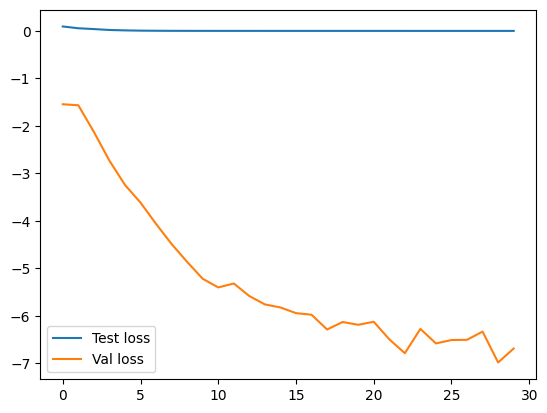

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=range(len(test_losses)), y=test_losses, label="Test loss")
sns.lineplot(x=range(len(test_losses)), y=val_losses, label="Val loss")
plt.legend()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
import torch

@torch.no_grad()
def test_more_metrics(model, loader, loss_fn):
    model.eval()
    total_loss = 0
    count = 0

    all_predictions = []
    all_y = []
    all_probs = []  # for ROC-AUC

    for batch in loader:
        batch.x, batch.edge_index, batch.y, batch.batch = \
            batch.x.to(device), batch.edge_index.to(device), batch.y.to(device), batch.batch.to(device)

        # Node-level output
        out = model(batch.x, batch.edge_index)

        # Graphlet-level output
        graphlet_out = scatter_mean(out, batch.batch, dim=0)  # [num_graphlets, num_classes]
        y = batch.y  # graphlet labels

        # Only compute loss on labeled graphlets
        mask = (y != 2)
        if mask.sum() == 0:
            continue

        y_remapped = y[mask].long()
        masked_out = graphlet_out[mask]

        probs = torch.softmax(masked_out, dim=1)  # probabilities
        predicted_classes = masked_out.argmax(dim=1)

        all_predictions.extend(predicted_classes.cpu().tolist())
        all_y.extend(y_remapped.cpu().tolist())
        all_probs.extend(probs.cpu().tolist())

        total_loss += loss_fn(masked_out, y_remapped).item()
        count += 1

    # Convert to tensors/numpy for sklearn
    import numpy as np
    all_y = np.array(all_y)
    all_predictions = np.array(all_predictions)
    all_probs = np.array(all_probs)

    # Metrics
    f1 = f1_score(all_y, all_predictions, average=None, zero_division=0)
    precision = precision_score(all_y, all_predictions, average=None, zero_division=0)
    recall = recall_score(all_y, all_predictions, average=None, zero_division=0)
    accuracy = accuracy_score(all_y, all_predictions)

    # ROC-AUC (only works for binary)
    if all_probs.shape[1] == 2:
        roc_auc = roc_auc_score(all_y, all_probs[:,0])  # positive class = 0
    else:
        roc_auc = None

    print("F1:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    if roc_auc is not None:
        print("ROC-AUC:", roc_auc)

    print(all_predictions.tolist().count(0), "vs", all_y.tolist().count(0),
          "|", all_predictions.tolist().count(1), "vs", all_y.tolist().count(1))

    return f1, accuracy, roc_auc, total_loss / max(count, 1)


In [ ]:
test_more_metrics(model, test_loader, loss_fn)

F1: [0.97537534 0.92022867]
Precision: [0.97471377 0.9222565 ]
Recall: [0.97603782 0.91820974]
Accuracy: 0.9623674875007779
ROC-AUC: 0.9684984289047949
36858 vs 36808 | 11345 vs 11395


(array([0.97537534, 0.92022867]),
 0.9623674875007779,
 0.9684984289047949,
 -6.087886492411296)

In [ ]:
len(test_dataset), len(train_dataset)

(48203, 394421)

Test new vs old GraphletDataset

In [ ]:
# from torch_geometric.utils import to_networkx

# test_old = graphlet_dataset.load_dataset("graphlet_datasets/tx_graphlet_test_dataset.pt")
# test_dataset = graphlet_dataset.load_dataset("graphlet_datasets/tx_graphlet_test_dataset_new.pt")

# for i in range(len(test_old.data_list)):
#     d1 = test_old.data_list[0]
#     d2 = test_dataset.data_list[0]

#     d1_ = to_networkx(d1)
#     d2_ = to_networkx(d2)
#     if not nx.is_isomorphic(d1_, d2_):
#         print("Not isomorphic")
    